# 模型选择 + 过拟合和欠拟合

>通过多项式拟合来交互探索

In [1]:
import math
import numpy as np
import torch
from torch import nn, optim
from d2l import torch as d2l

In [2]:
# 最大拟合项
max_degree = 20
# 训练样本规模
n_train, n_test = 100, 100
# 设定真实的权重
true_w = np.zeros(max_degree)
true_w[:4] = np.array([5, 0.001, 0, 0])
true_b = 2.0

In [3]:
features = np.random.random(size=(n_train + n_test)) * 10  # 生成原始的特征
# np.random.shuffle(features)
features = np.sort(features).reshape(-1, 1) 
# print(features)
# 特征工程: 生成多项式项
poly_features = np.power(features, np.arange(1, max_degree+1).reshape(1, -1))
# 产生标签数据
labels = np.dot(poly_features, true_w) + true_b
labels += np.random.normal(scale=0.1, size=labels.shape)

> 实现一个函数来评估模型在给定数据集上的损失 

In [4]:
class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.poly = nn.Linear(degree, 1)
    
    def forward(self, x):
        x = torch.Tensor(x)
        return self.poly(x)


def train_polynomial_regression(features, labels, degree, num_epochs, learning_rate):
    features, labels = torch.Tensor(features), torch.Tensor(labels)
    # Initialize the model, loss function, and optimizer
    model = PolynomialRegression(degree)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model


In [5]:
# Parameters
num_epochs = 100
learning_rate = 0.1

train_index = np.random.choice(np.arange(0, 200), 100, replace=False)
train_index = np.sort(train_index)

In [6]:
# 拟合项
def overfitting_show(features, poly_features, labels, degrees, num_epochs, learning_rate):
    """
    :param poly_feateures: 多项式特征
    :param labels: 标签
    :param degress: 特征阶数
    ...
    """
    test_labels = labels[~train_index].reshape(-1)
    test_x = features[~train_index].reshape(-1)
    hats = {}
    for degree in degrees:
        train_features, train_labels = poly_features[train_index,:degree], labels[train_index]
        # print(train_features.shape)
        # print(train_features)
        # return
        test_features = poly_features[~train_index,:degree]
        # Train the model
        model = train_polynomial_regression(train_features, train_labels, degree, num_epochs, learning_rate)

        # Test the model
        test_y_hat = model(test_features)
        hats[degree] = test_y_hat.reshape(-1)
    
    return test_x, test_labels, hats

In [7]:
degrees = [3, ]

In [8]:
x, y, hats = overfitting_show(features, poly_features, labels, degrees, num_epochs, learning_rate)

Epoch [10/100], Loss: inf
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


/root/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [9]:
import matplotlib.pyplot as plt

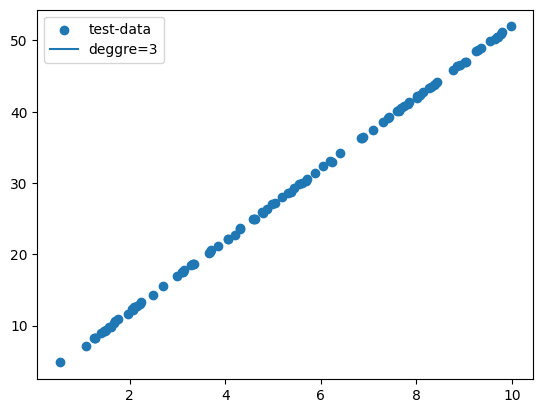

In [10]:
sort_index = np.argsort(x)
x, y = x[sort_index], y[sort_index]
plt.scatter(x, y, label='test-data')
for degree, y_hat in hats.items():
    plt.plot(x, y_hat.detach().numpy().reshape(-1)[sort_index], label=f"deggre={degree}")
plt.legend()
plt.show()